In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read files
pitstopsDf = pd.read_csv('data/base/pit_stops.csv')
laptimesDf = pd.read_csv('data/base/lap_times.csv')

In [3]:
# race in consideration
# raceId = 918 # 14 abu dhabi
raceId = 982 # singapore 2017 rain
# raceId = 980 # 2017 belgian
# raceId = 1015 # 2019 monaco
# raceId = 999 # 2018 german
# raceId = 915 # 2016 russian
# raceId = 987 # 2017 brazil

In [4]:
# filter data frame for this race
raceLaptimes = laptimesDf[laptimesDf.raceId==raceId]
racePitstops = pitstopsDf[pitstopsDf.raceId==raceId]

In [5]:
# drivers in this race 
driverIds = set(raceLaptimes.driverId)

In [6]:
# for each lap 
#     remove the times with pitstops,[if pitstop in lap x, remove times for lap x and lap x+1]

In [7]:
# get laps
laps = list(set(raceLaptimes.lap))
laps.sort()

In [8]:
countedRaceTimes = []
countedLaps = []
for lap in laps:
    times = []
    for driver in driverIds:
        pitstop_true = (driver in set(racePitstops[racePitstops.lap==lap].driverId)) | (driver in set(racePitstops[racePitstops.lap==(lap+1)].driverId))
        driver_did_not_do_lap = (lap > max(list(set(raceLaptimes[raceLaptimes.driverId==driver].lap))))
        if pitstop_true | driver_did_not_do_lap:
            continue
        laptime = raceLaptimes[(raceLaptimes.lap==lap) & (raceLaptimes.driverId==driver)].milliseconds.values[0]
        times.append(laptime)
    if len(times)==0:
        continue;
    countedLaps.append(lap)
    countedRaceTimes.append(times)
        

In [9]:
# mean, std
mean = []
std = []
for lap in countedRaceTimes:
    mean.append(np.mean(lap))
    std.append(np.std(lap))
mean = np.array(mean)
std = np.array(std)

overallmean = np.mean(mean.reshape(-1))
globalmean = [overallmean for lap in countedLaps]

<Figure size 576x432 with 0 Axes>

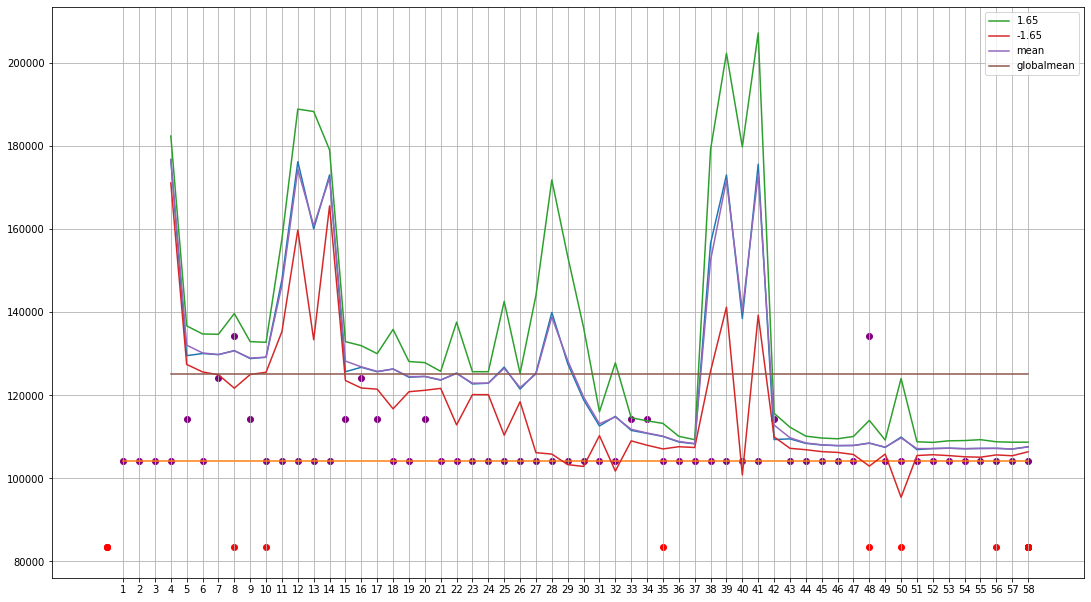

<Figure size 576x432 with 0 Axes>

In [10]:
# plots
val165 = mean + 1.65*std
valm165 = mean - 1.65*std
val196 = mean + 1.96*std
valm196 = mean -1.96*std




resultsDf = pd.read_csv('data/base/results.csv')
total_laps = max(list(set(raceLaptimes.lap)))
res982 = resultsDf[resultsDf.raceId==raceId]
driverids = set(res982.driverId)
laps = [x for x in range(1,total_laps+1)]
status_arr = [[] for _ in laps]
x, y = [], []
for driver in driverids:
    tmp = res982[res982.driverId==driver]
    status_arr[tmp.laps.values[0]-1].append(tmp.statusId.values[0])
    x.append(tmp.laps.values[0])
    y.append(tmp.statusId.values[0])

    
change = [0]
prev = mean[0]
for i in range(1,len(mean)):
    ch = ((mean[i]-prev)*10000)/prev
    prev = mean[i]
    change.append(ch)
plt.plot(countedLaps, change+mean)


overtakesDf = pd.read_csv('data/derived/overtaking/overtaking.csv')
raceId=982
race982 = overtakesDf[overtakesDf.raceId==raceId]
a,b=[],[]
for lap in laps:
    tmp = race982[race982.lap==lap]
    a.append(lap)
    b.append(len(tmp.values))
status_arr
# status codes
plt.scatter(x, np.array(y)+(overallmean*(2/3)),color='red')
# overtkaes
plt.scatter(a, np.array(b)*10000 + (overallmean/2 + overallmean/3),color='purple')
# 0 overtake line
plt.plot(a, np.zeros(len(a))+(overallmean/2 + overallmean/3))

plt.plot(countedLaps, val165, label='1.65')
plt.plot(countedLaps, valm165, label='-1.65')
# plt.plot(countedLaps, valm196, label='-1.96')
# plt.plot(countedLaps, val196, label='1.96')
plt.plot(countedLaps, mean, label='mean')
plt.plot(countedLaps, globalmean, label='globalmean')
plt.legend(loc='upper right')
plt.xticks(laps)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.figure(figsize=(8,6))




In [11]:
std

array([ 3422.14588883,  2813.23134036,  2771.08014617,  2958.42949429,
        5448.28373662,  2398.24078672,  2186.23227393,  6771.32455192,
        8820.08943471, 16655.83589473,  4088.76664153,  2837.43618705,
        3089.33676258,  2589.00349989,  5795.94859037,  2204.88136844,
        2020.10584816,  1241.48418419,  7494.7198735 ,  1671.32054936,
        1675.81524804,  9763.80247106,  2069.25157938, 11479.59049792,
       20006.36949785, 15195.23982649, 10137.05687675,  1740.18561642,
        7896.66273983,  1685.0978    ,  1781.11032287,  1862.34251057,
         758.51153126,   573.05673776, 16179.56062444, 18530.56971064,
       23936.42737321, 20589.50613846,  1719.16289697,  1543.1020176 ,
         989.53862677,   991.59504829,   994.93233541,  1315.79667223,
        3336.80956934,  1021.77807662,  8671.82944807,  1002.6757916 ,
         899.52569292,  1078.73687387,  1183.95998372,  1280.03538091,
         957.00436476,   989.34646598,   702.26050592])

10.610243363985361


<Figure size 576x432 with 0 Axes>

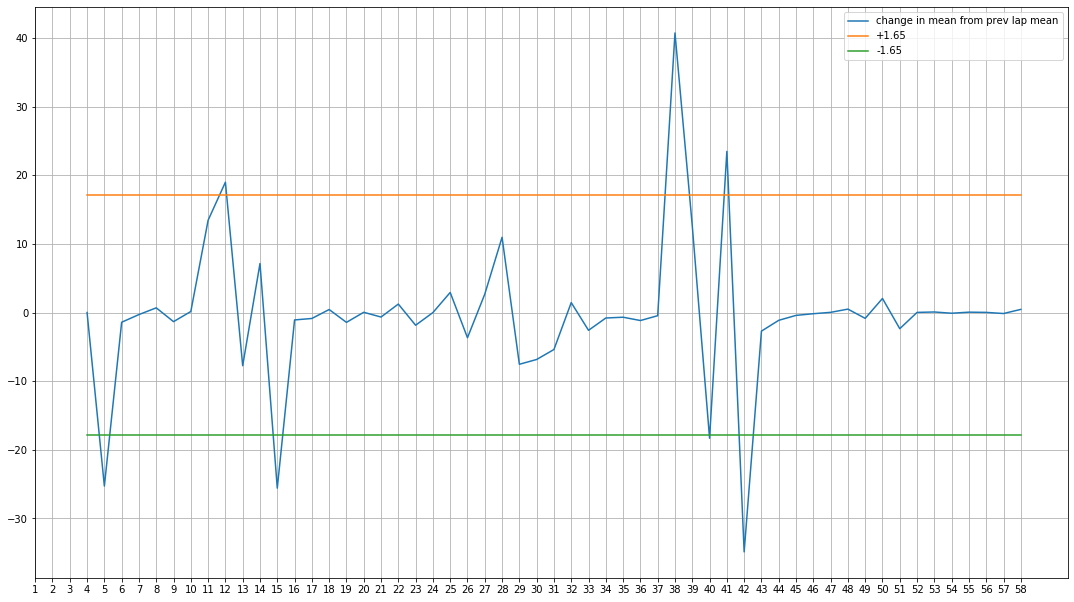

<Figure size 576x432 with 0 Axes>

In [13]:
# change
change = [0]
# m10 = [-10]
# p10 = [10]
prev = mean[0]
for i in range(1,len(mean)):
    ch = ((mean[i]-prev)*100)/prev
    prev = mean[i]
#     m10.append(-10)
#     p10.append(10)
    change.append(ch)

chMean = np.mean(change)
chStd = np.std(change)
print(chStd)

p165 = []
m165 = []
for _ in range(len(change)):
    p165.append(chMean + 1.65*chStd)    
    m165.append(chMean - 1.65*chStd)



    
# smoothing

plt.plot(countedLaps, change, label="change in mean from prev lap mean")
plt.plot(countedLaps, p165,label="+1.65")
plt.plot(countedLaps, m165, label="-1.65")
plt.xticks(laps)
plt.grid()
plt.legend(loc='upper right')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.figure(figsize=(8,6))


In [ ]:
# change
change = [0]
# m10 = [-10]
# p10 = [10]
prev = mean[0]
for i in range(1,len(mean)):
    ch = ((mean[i]-prev)*100)/prev
    prev = mean[i]
#     m10.append(-10)
#     p10.append(10)
    change.append(ch)

chMean = np.mean(change)
chStd = np.std(change)

p165 = []
m165 = []
for _ in range(len(change)):
    p165.append(chMean + 1.65*chStd)    
    m165.append(chMean - 1.65*chStd)



    
# smoothing

plt.plot(countedLaps, change, label="change in mean from prev lap mean")
plt.plot(countedLaps, p165,label="+1.65")
plt.plot(countedLaps, m165, label="-1.65")
plt.xticks(laps)
plt.grid()
plt.legend(loc='upper right')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.figure(figsize=(8,6))